In [1]:
from utils.utils import preprocess_watch_data
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from math import sin,cos
from numpy import random
import sys
from utils.utils import preprocess_watch_data
from utils.utils import get_yaw_pitch_roll
from utils.utils import get_rotation_matrix_from_yaw_pitch_roll
from utils.utils import get_rotated_basis
from utils.utils import get_tilt_correction_rotation_matrix_from_accelerometer
import numpy as np

df = preprocess_watch_data("data/2022-01-24_19_34_26_Andrew’sAppleWatch.csv",save=False,plot=False)

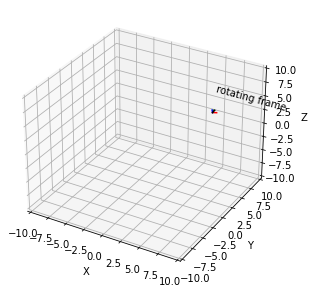

In [2]:
acc = np.array(df[['acc_x','acc_y','acc_z']])
omega = np.array(df[['gyr_x','gyr_y','gyr_z']])
time = df['gyr_t']
yaw_pitch_rolls = [np.zeros(3)]
Rs = [np.eye(3,3)]
R_tilts = [np.eye(3,3)]
bases = [np.eye(3,3)]
velocities = [np.zeros(3)]
positions = [np.zeros(3)]

for i,_ in enumerate(time):
    if (i==0):
        # don't have delta t, next
        continue
    delta_t = time[i]-time[i-1]
    yaw_pitch_roll = get_yaw_pitch_roll(i,omega,time,yaw_pitch_rolls)
    yaw_pitch_rolls.append(yaw_pitch_roll)
    R_tilt = get_tilt_correction_rotation_matrix_from_accelerometer(acc[i])
    R = get_rotation_matrix_from_yaw_pitch_roll(*yaw_pitch_roll)
    Rs.append(R)
    R_tilts.append(R_tilt)
    R = R @ R_tilt
    acc_global = R @ acc[i]
    acc_global = acc_global + np.array([0,0,1])
    velocity = acc_global*delta_t + velocities[i-1]
    velocities.append(velocity)
    position = velocity*delta_t + positions[i-1]
    positions.append(position)
    bases.append(get_rotated_basis(bases[0],R))

from utils.utils import animate_trajectory
animate_trajectory(time,bases,trajectory=positions)

np.save('rpy.npy',np.array(yaw_pitch_rolls))
np.save('pos.npy',np.array(positions))